# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.

Dataset: The chosen dataset for this assignment is: https://archive.ics.uci.edu/dataset/59/letter+recognition

In [6]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# fetch dataset 
letter_recognition = fetch_ucirepo(id=59) 
  
# data (as pandas dataframes) 
X = letter_recognition.data.features 
y = letter_recognition.data.targets 
  
# variable information 
print(letter_recognition.variables) 

     name     role         type demographic                    description  \
0   lettr   Target  Categorical        None                 capital letter   
1   x-box  Feature      Integer        None     horizontal position of box   
2   y-box  Feature      Integer        None       vertical position of box   
3   width  Feature      Integer        None                   width of box   
4    high  Feature      Integer        None                  height of box   
5   onpix  Feature      Integer        None              total # on pixels   
6   x-bar  Feature      Integer        None     mean x of on pixels in box   
7   y-bar  Feature      Integer        None     mean y of on pixels in box   
8   x2bar  Feature      Integer        None                mean x variance   
9   y2bar  Feature      Integer        None                mean y variance   
10  xybar  Feature      Integer        None           mean x y correlation   
11  x2ybr  Feature      Integer        None              mean of

In [8]:
if isinstance(letter_recognition.data.targets, pd.DataFrame):
    y = letter_recognition.data.targets.squeeze()
else:
    y = pd.Series(letter_recognition.data.targets, name='target')

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [9]:
clf = DecisionTreeClassifier(random_state=69)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [10]:
print("Features Head:")
print(X.head())  
print("Targets Head:")
print(y.head()) 

Features Head:
   x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  \
0      2      8      3     5      1      8     13      0      6      6     10   
1      5     12      3     7      2     10      5      5      4     13      3   
2      4     11      6     8      6     10      6      2      6     10      3   
3      7     11      6     6      3      5      9      4      6      4      4   
4      2      1      3     1      1      8      6      6      6      6      5   

   xy2br  x-ege  xegvy  y-ege  yegvx  
0      8      0      8      0      8  
1      9      2      8      4     10  
2      7      3      7      3      9  
3     10      6     10      2      8  
4      9      1      7      5     10  
Targets Head:
0    T
1    I
2    D
3    N
4    G
Name: lettr, dtype: object


Classes in clf: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
Generated class names: ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10', 'Class 11', 'Class 12', 'Class 13', 'Class 14', 'Class 15', 'Class 16', 'Class 17', 'Class 18', 'Class 19', 'Class 20', 'Class 21', 'Class 22', 'Class 23', 'Class 24', 'Class 25', 'Class 26']


<Figure size 28000x3000 with 0 Axes>

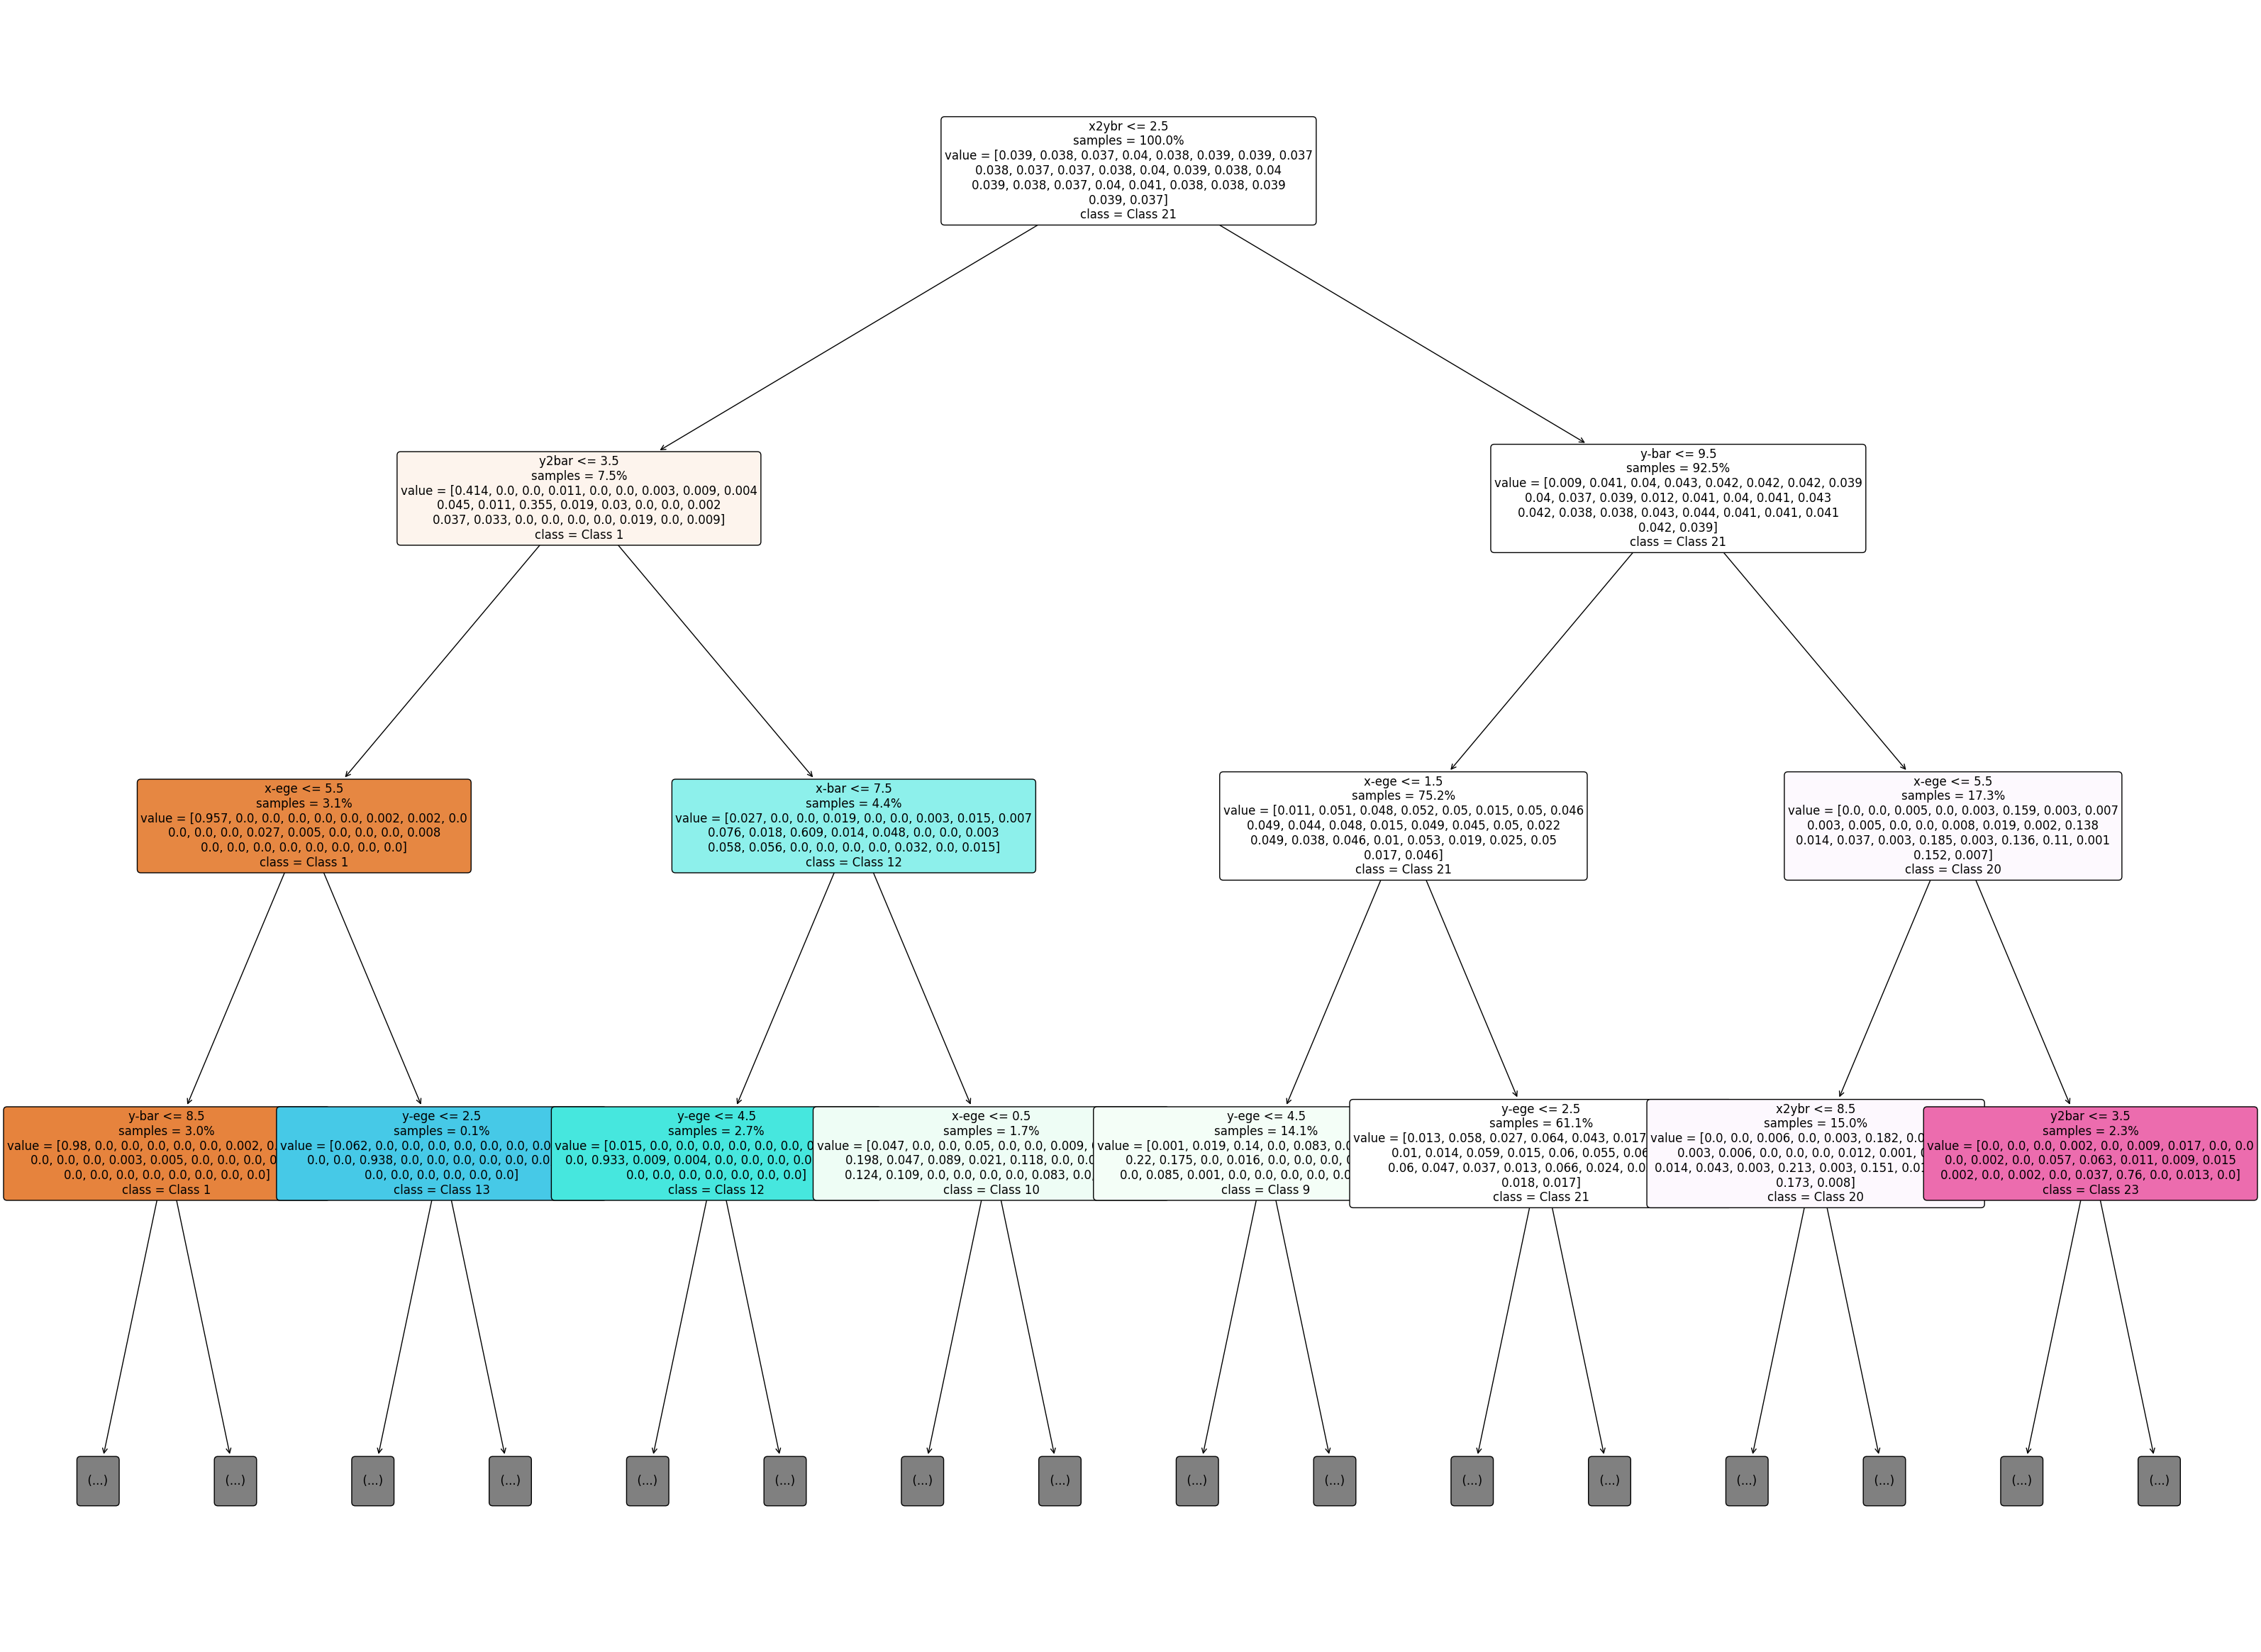

In [21]:
print("Classes in clf:", clf.classes_)
class_names = [f'Class {i}' for i in range(1, len(clf.classes_) + 1)]
print("Generated class names:", class_names)

clf_pruned = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=10)
clf_pruned.fit(X, y)

depth = clf_pruned.get_depth()
plt.figure(figsize=(depth * 10, 30))

plt.figure(figsize=(40, 30))  
plot_tree(clf_pruned, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, fontsize=12, max_depth=3, impurity=False, proportion=True)
plt.show()

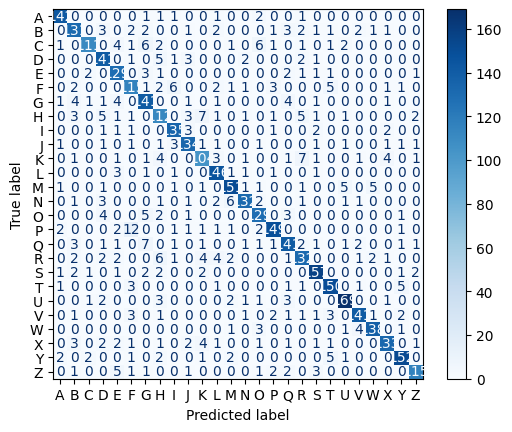

Confusion Matrix:
[[142   0   0   0   0   0   1   1   1   0   0   1   0   0   2   0   0   1
    0   0   0   0   0   0   0   0]
 [  0 131   0   3   0   2   2   0   0   1   0   2   0   0   0   1   3   2
    1   1   0   2   1   1   0   0]
 [  1   0 111   0   4   1   6   2   0   0   0   0   1   0   6   1   0   1
    0   1   2   0   0   0   0   0]
 [  0   0   0 141   0   1   0   5   1   3   0   0   0   2   0   0   0   2
    1   0   0   0   0   0   0   0]
 [  0   0   2   0 129   0   3   1   0   0   0   0   0   0   0   0   2   1
    1   1   0   0   0   0   0   1]
 [  0   2   0   0   0 115   1   2   6   0   0   2   1   1   0   3   0   0
    0   5   0   0   0   1   1   0]
 [  1   4   1   1   4   0 141   0   0   1   0   1   0   0   0   0   4   0
    1   0   0   0   0   1   0   0]
 [  0   3   0   5   1   1   0 112   0   3   7   1   0   1   0   1   0   5
    1   0   1   0   0   0   0   2]
 [  0   0   0   1   1   1   0   0 135   3   0   0   0   0   0   1   0   0
    2   0   0   0   0   2   0   0]
 

In [15]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

print("Confusion Matrix:")
print(cm)

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")

In [16]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           A       0.93      0.95      0.94       149
           B       0.85      0.86      0.85       153
           C       0.94      0.81      0.87       137
           D       0.84      0.90      0.87       156
           E       0.83      0.91      0.87       141
           F       0.80      0.82      0.81       140
           G       0.82      0.88      0.85       160
           H       0.77      0.78      0.77       144
           I       0.89      0.92      0.91       146
           J       0.89      0.90      0.89       149
           K       0.83      0.80      0.81       130
           L       0.88      0.94      0.91       155
           M       0.90      0.90      0.90       168
           N       0.93      0.87      0.90       151
           O       0.86      0.89      0.87       145
           P       0.92      0.86      0.89       173
           Q       0.87      0.85      0.86       166
    